# Daniel Ricciardo

<img src="https://www.formula1.com/content/fom-website/en/drivers/daniel-ricciardo/_jcr_content/image.img.1920.medium.jpg/1646818924510.jpg" width="300">

### Team: McLaren

<img src ="https://www.formula1.com/content/fom-website/en/drivers/daniel-ricciardo/_jcr_content/helmet.img.png/1646824802474.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

ric_laps <- lap_data %>%
            filter(driverId == 817)

# Season Analysis

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5465773,91.09621,1.51827


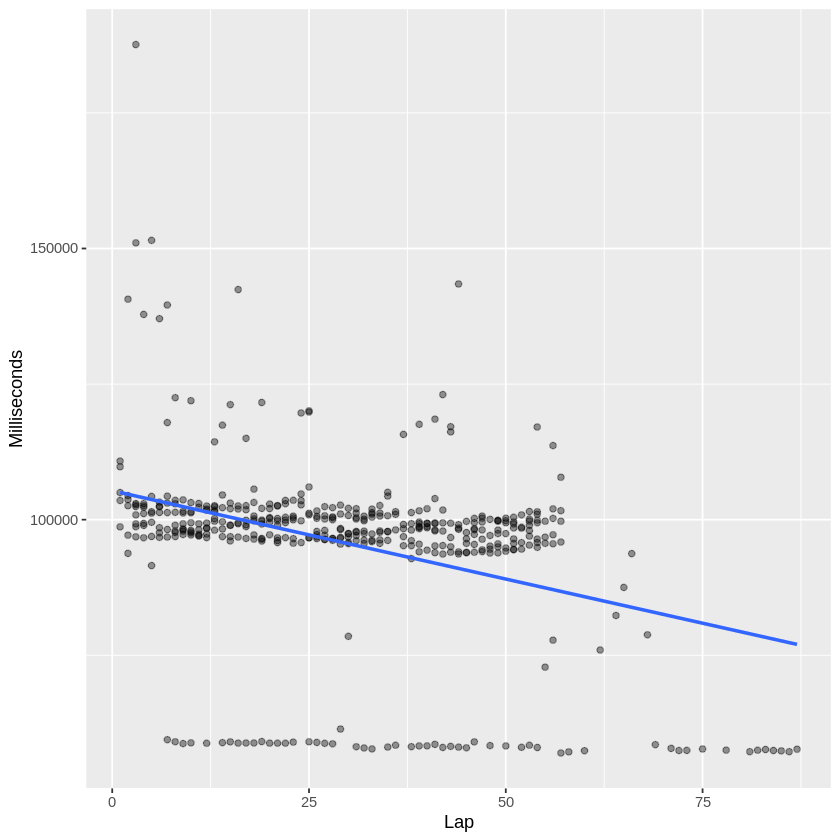

In [4]:
#1. Bahrain 

dr_bahrain <- ric_laps %>%
                filter(raceId %in% bahrain_race_ID) 

dr_bahrain_clean <- dr_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

dr_bahrain_clean_ID <- dr_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_bahrain_races <- ric_laps %>%
                    filter(raceId %in% dr_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6970566,116.1761,1.936268


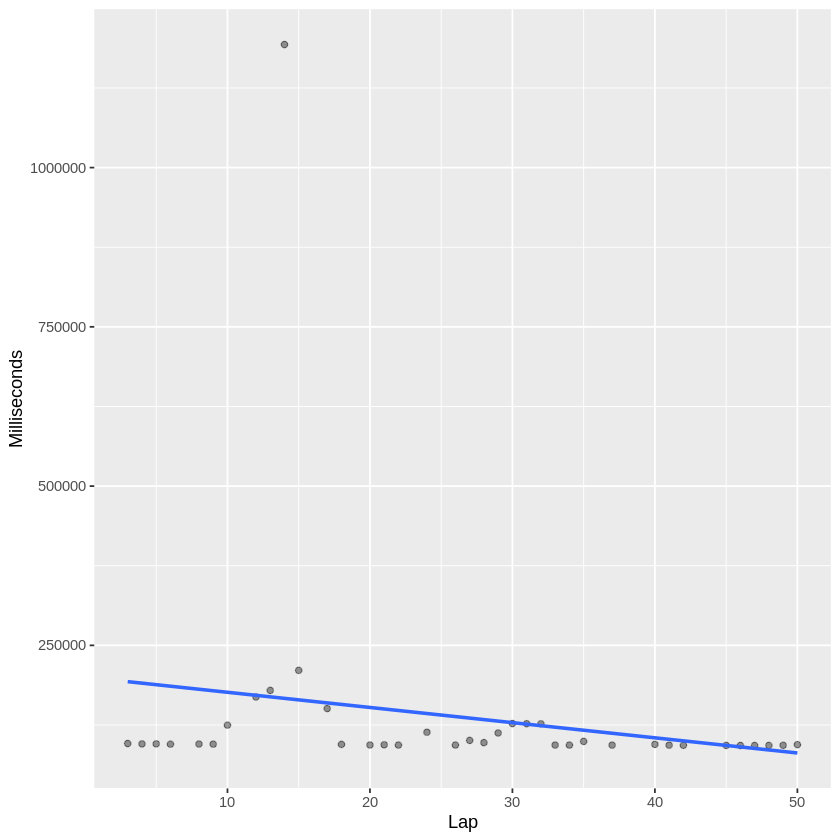

In [5]:
#2. Saudi Arabia

dr_saudi <- ric_laps %>%
                filter(raceId %in% saudi_race_ID) 

dr_saudi_clean <- dr_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_saudi_clean_ID <- dr_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_saudi_races <- ric_laps %>%
                    filter(raceId %in% dr_saudi_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5513668,91.89447,1.531574


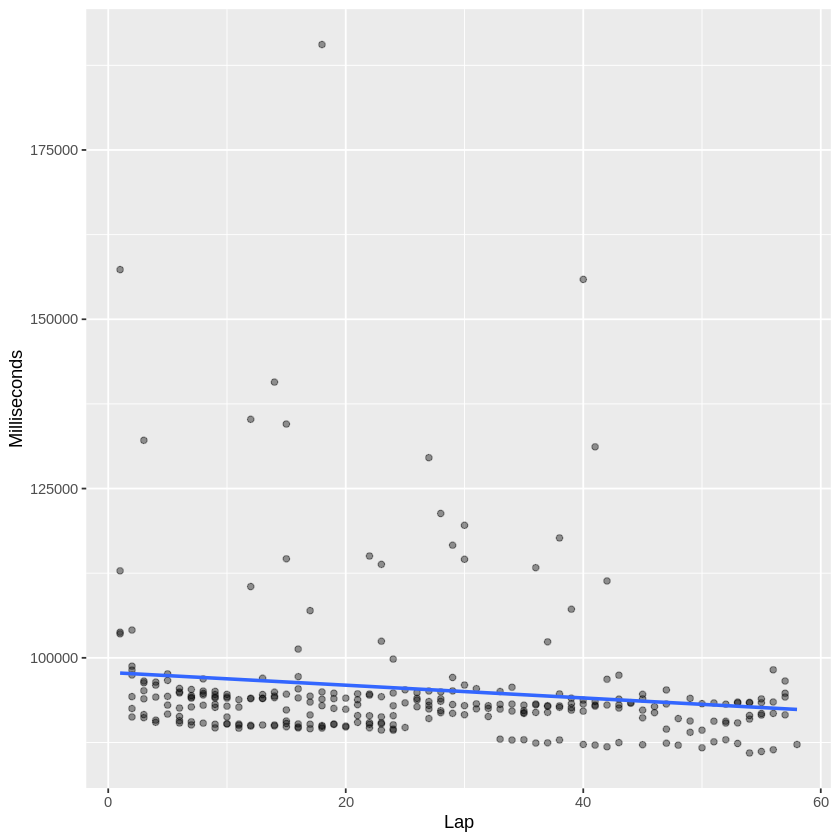

In [6]:
#3. Australia

dr_aus <- ric_laps %>%
                filter(raceId %in% aus_race_ID) 

dr_aus_clean <- dr_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_aus_clean_ID <- dr_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_aus_races <- ric_laps %>%
                    filter(raceId %in% dr_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(dr_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5544379,92.40632,1.540105


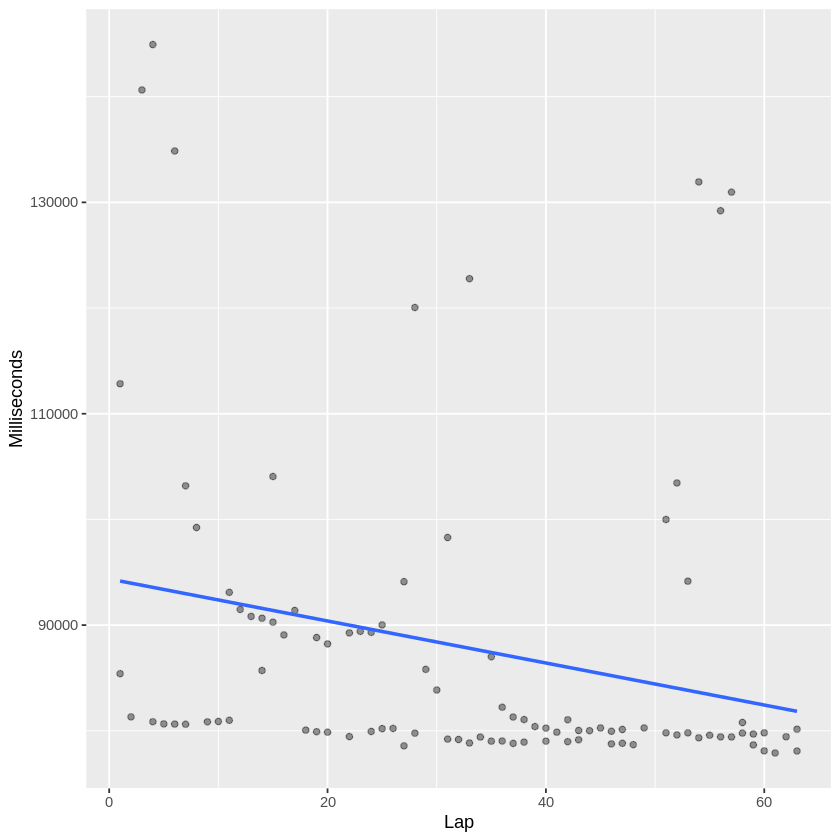

In [7]:
#4. Italy, Imola

dr_imola <- ric_laps %>%
                filter(raceId %in% imola_race_ID) 

dr_imola_clean <- dr_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_imola_clean_ID <- dr_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_imola_races <- ric_laps %>%
                    filter(raceId %in% dr_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5788869,96.48115,1.608019


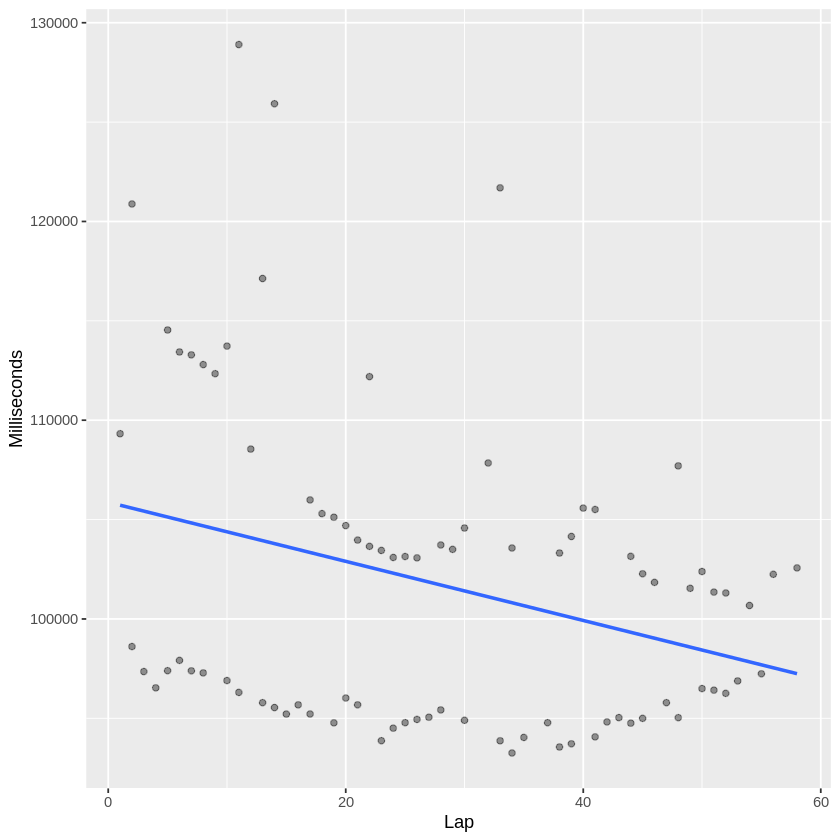

In [8]:
#5. Turkey (Replacing Miami)

dr_turkey <- ric_laps %>%
                filter(raceId %in% turkey_race_ID) 

dr_turkey_clean <- dr_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_turkey_clean_ID <- dr_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_turkey_races <- ric_laps %>%
                    filter(raceId %in% dr_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5936222,98.93704,1.648951


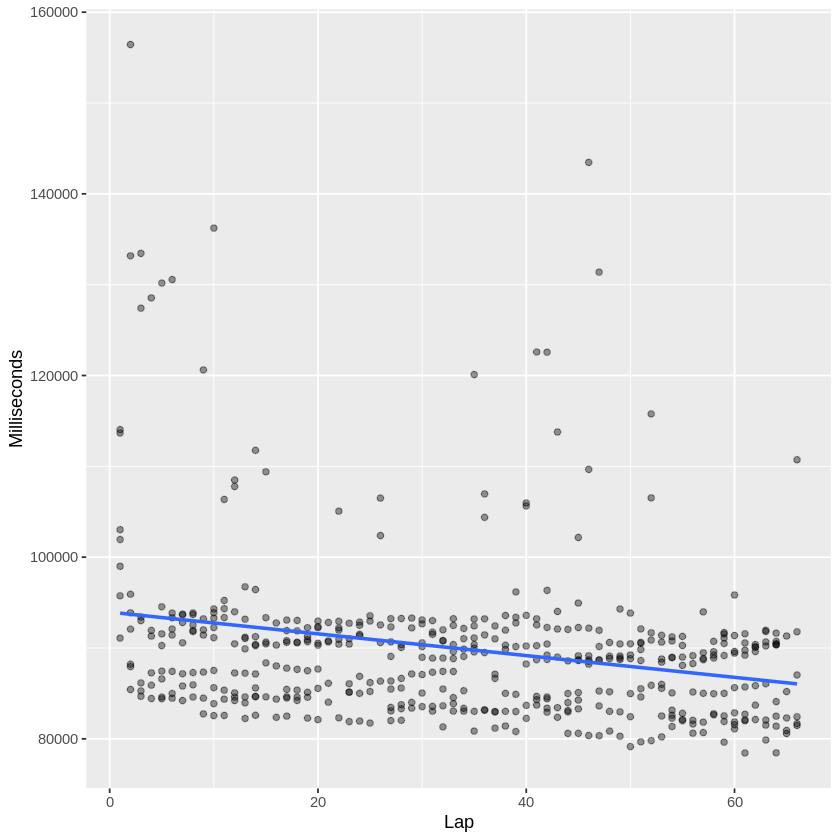

In [9]:
#6. Spain

dr_spain <- ric_laps %>%
                filter(raceId %in% spain_race_ID) 

dr_spain_clean <- dr_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_spain_clean_ID <- dr_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_spain_races <- ric_laps %>%
                    filter(raceId %in% dr_spain_clean_ID)

formulaone_split <- initial_split(dr_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6462845,107.7141,1.795235


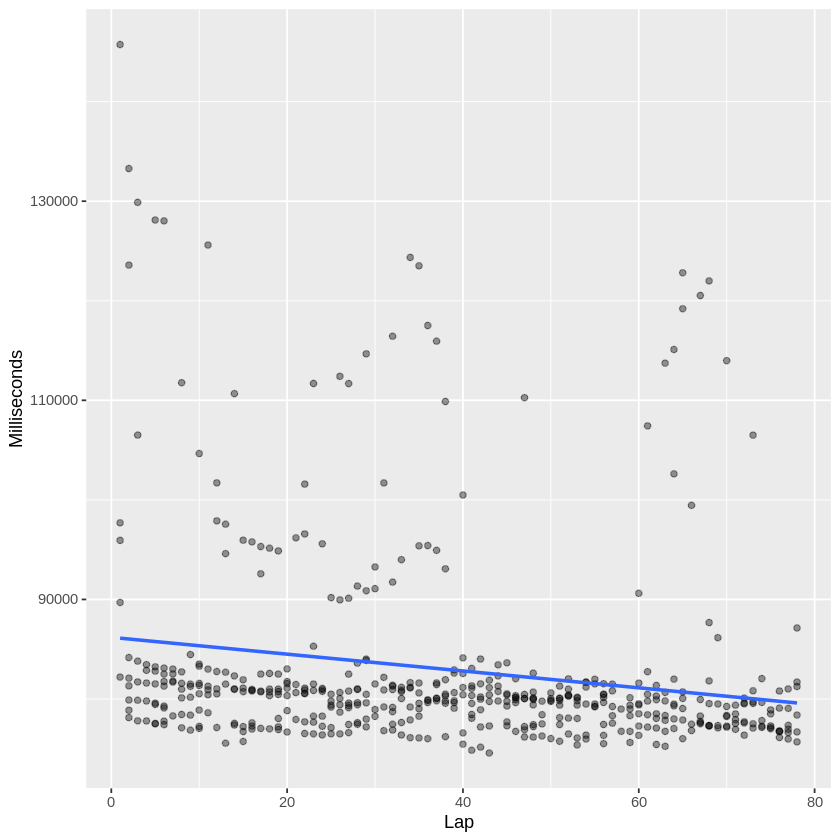

In [10]:
#7. Monaco

dr_monaco <- ric_laps %>%
                filter(raceId %in% monaco_race_ID) 

dr_monaco_clean <- dr_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_monaco_clean_ID <- dr_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_monaco_races <- ric_laps %>%
                    filter(raceId %in% dr_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5870399,97.83998,1.630666


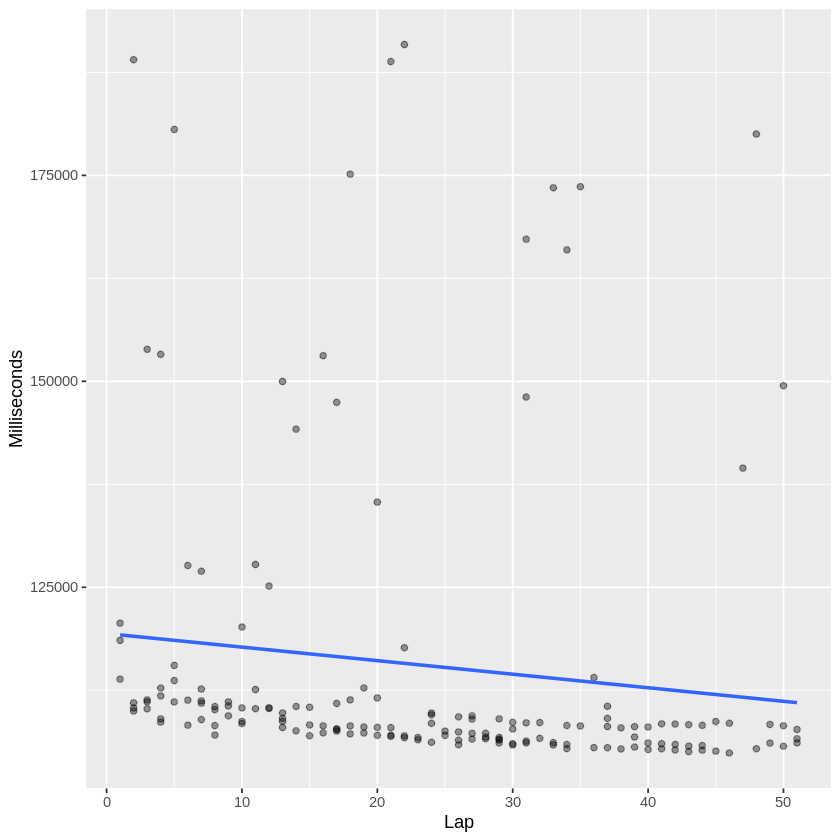

In [11]:
#8. Azerbaijan

dr_azerbaijan <- ric_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

dr_azerbaijan_clean <- dr_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_azerbaijan_clean_ID <- dr_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_azerbaijan_races <- ric_laps %>%
                    filter(raceId %in% dr_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5607961,93.46601,1.557767


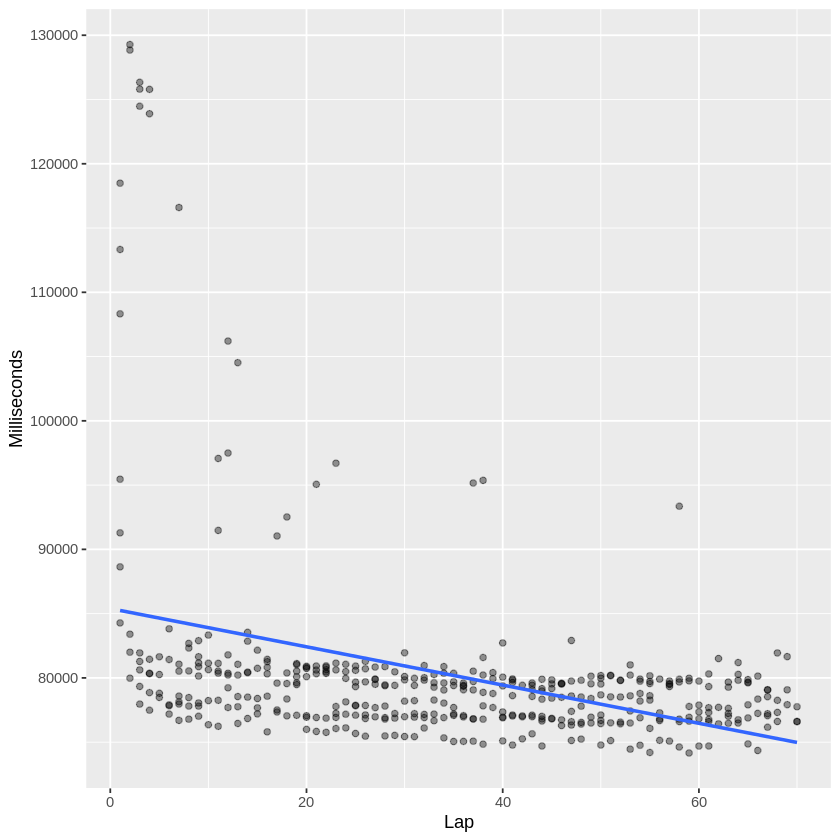

In [12]:
#9. Canada

dr_canada <- ric_laps %>%
                filter(raceId %in% canada_race_ID) 

dr_canada_clean <- dr_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_canada_clean_ID <- dr_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_canada_races <- ric_laps %>%
                    filter(raceId %in% dr_canada_clean_ID)

formulaone_split <- initial_split(dr_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5491203,91.52005,1.525334


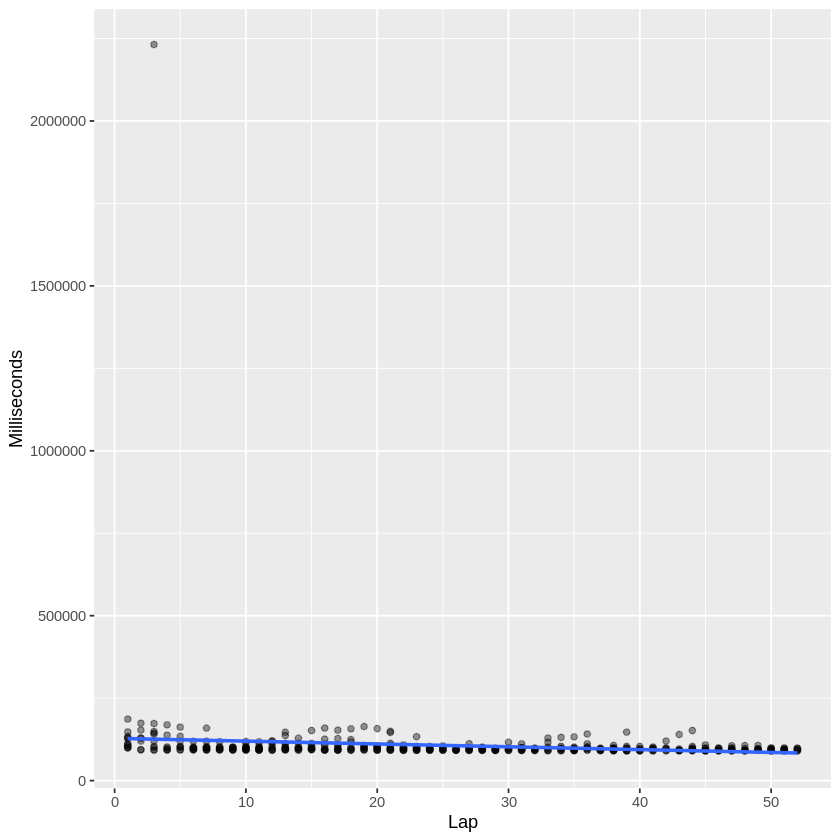

In [13]:
#10. Great Britain

dr_uk <- ric_laps %>%
                filter(raceId %in% uk_race_ID) 

dr_uk_clean <- dr_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_uk_clean_ID <- dr_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_uk_races <- ric_laps %>%
                    filter(raceId %in% dr_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5125102,85.41836,1.423639


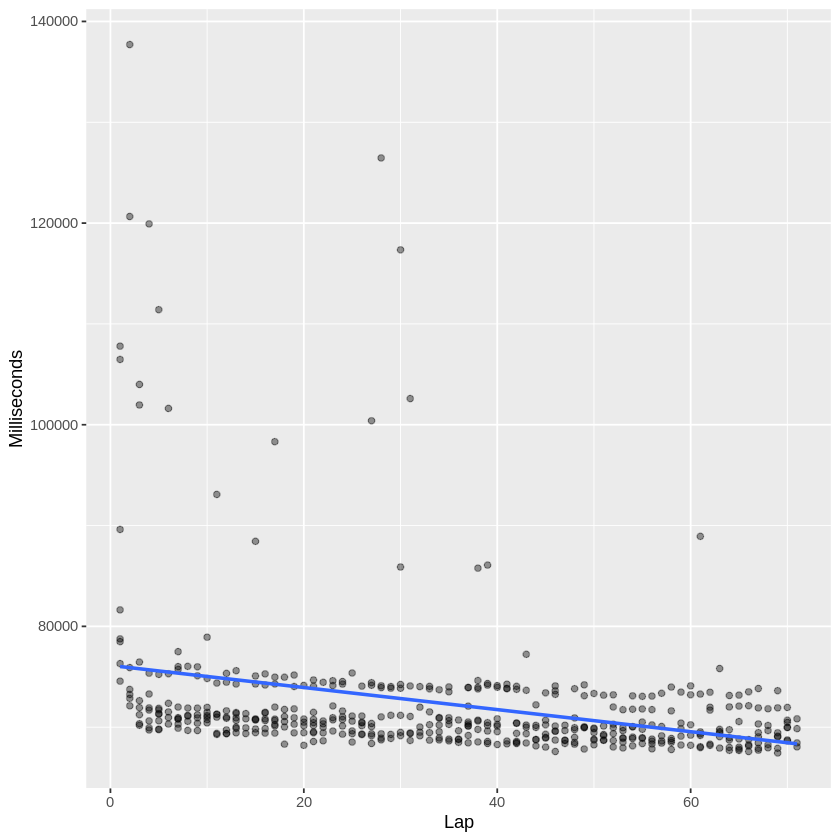

In [14]:
#11. Austria

dr_austria <- ric_laps %>%
                filter(raceId %in% austria_race_ID) 

dr_austria_clean <- dr_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_austria_clean_ID <- dr_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_austria_races <- ric_laps %>%
                    filter(raceId %in% dr_austria_clean_ID)

formulaone_split <- initial_split(dr_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
# #12. France

# dr_france <- ric_laps %>%
#                 filter(raceId %in% france_race_ID) 

# dr_france_clean <- dr_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 

# dr_france_clean_ID <- dr_france_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# dr_france_races <- ric_laps %>%
#                     filter(raceId %in% dr_france_clean_ID)

# formulaone_split <- initial_split(dr_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6229554,103.8259,1.730432


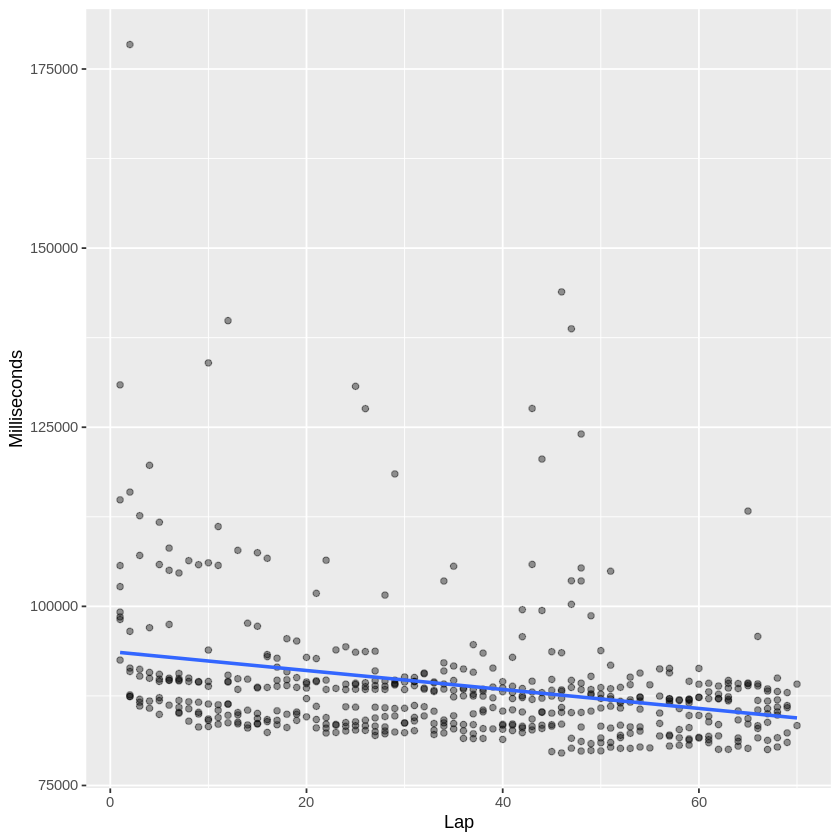

In [16]:
#13. Hungary

dr_hungary <- ric_laps %>%
                filter(raceId %in% hungary_race_ID) 

dr_hungary_clean <- dr_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

dr_hungary_clean_ID <- dr_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_hungary_races <- ric_laps %>%
                    filter(raceId %in% dr_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
871,44
891,44
911,44
960,44
980,44
1037,44
1022,43
1001,28
937,19


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5165284,86.08806,1.434801


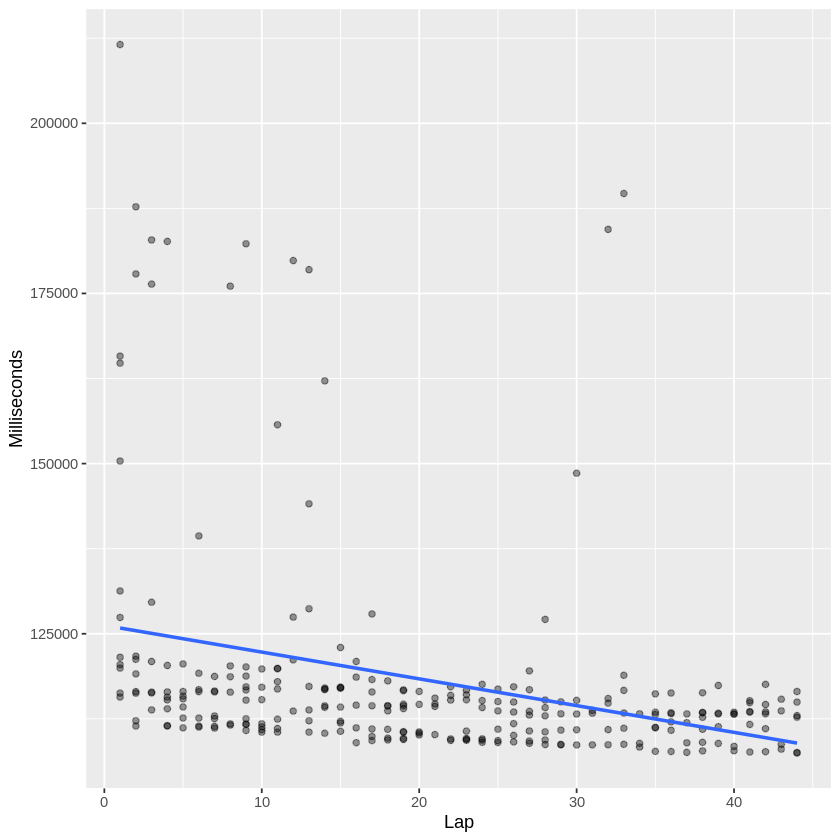

In [17]:
#14. Belgium

dr_belgium <- ric_laps %>%
                filter(raceId %in% belgium_race_ID) 

dr_belgium_clean <- dr_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_belgium_clean
dr_belgium_clean_ID <- dr_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_belgium_races <- ric_laps %>%
                    filter(raceId %in% dr_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(dr_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5551923,92.53205,1.542201


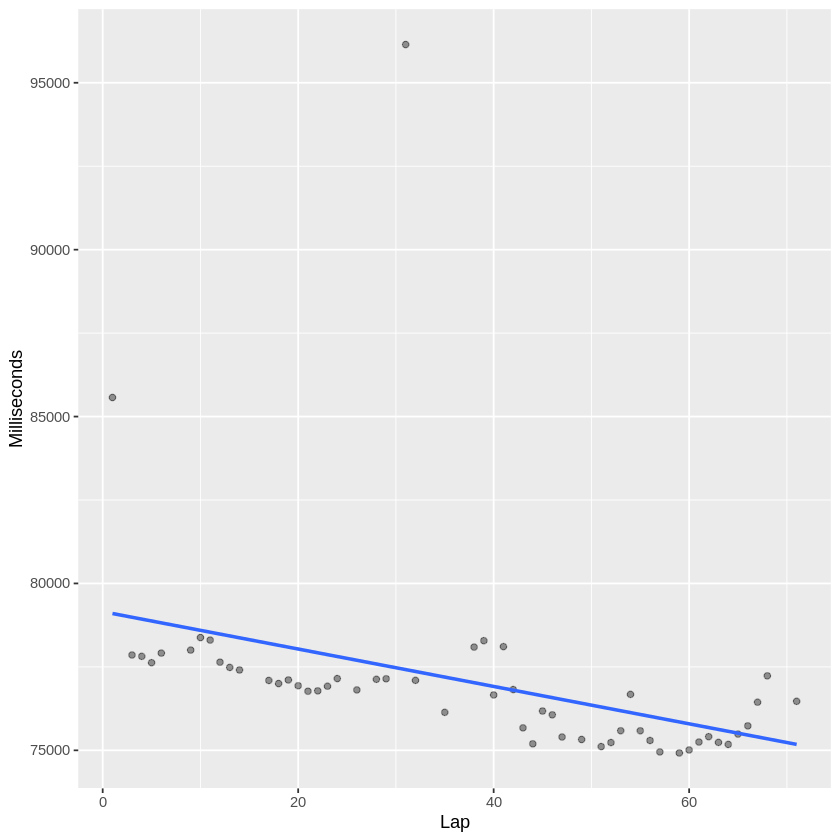

In [18]:
#15. Netherlands

dr_netherlands <- ric_laps %>%
                filter(raceId %in% netherlands_race_ID) 

dr_netherlands_clean <- dr_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_netherlands_clean
dr_netherlands_clean_ID <- dr_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_netherlands_races <- ric_laps %>%
                    filter(raceId %in% dr_netherlands_clean_ID)

formulaone_split <- initial_split(dr_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
872,53
892,53
912,53
961,53
981,53
1023,53
1038,53
1065,53
938,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4758250,79.30416,1.321736


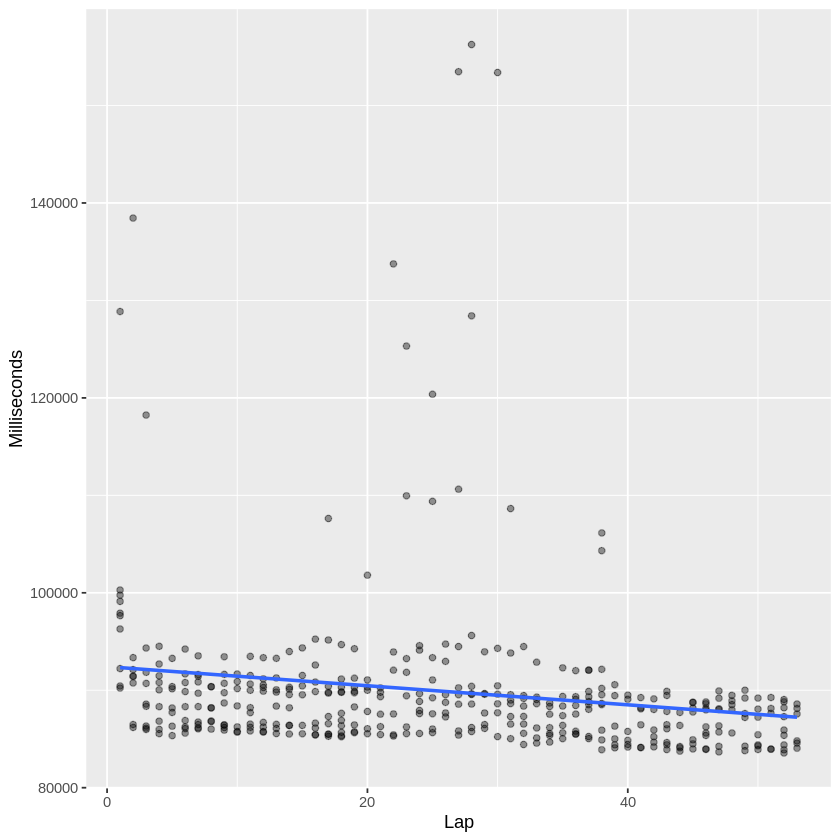

In [19]:
#16. Italy, Monza

dr_monza <- ric_laps %>%
                filter(raceId %in% monza_race_ID) 

dr_monza_clean <- dr_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
dr_monza_clean
dr_monza_clean_ID <- dr_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_monza_races <- ric_laps %>%
                    filter(raceId %in% dr_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(dr_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7272917,121.2153,2.020255


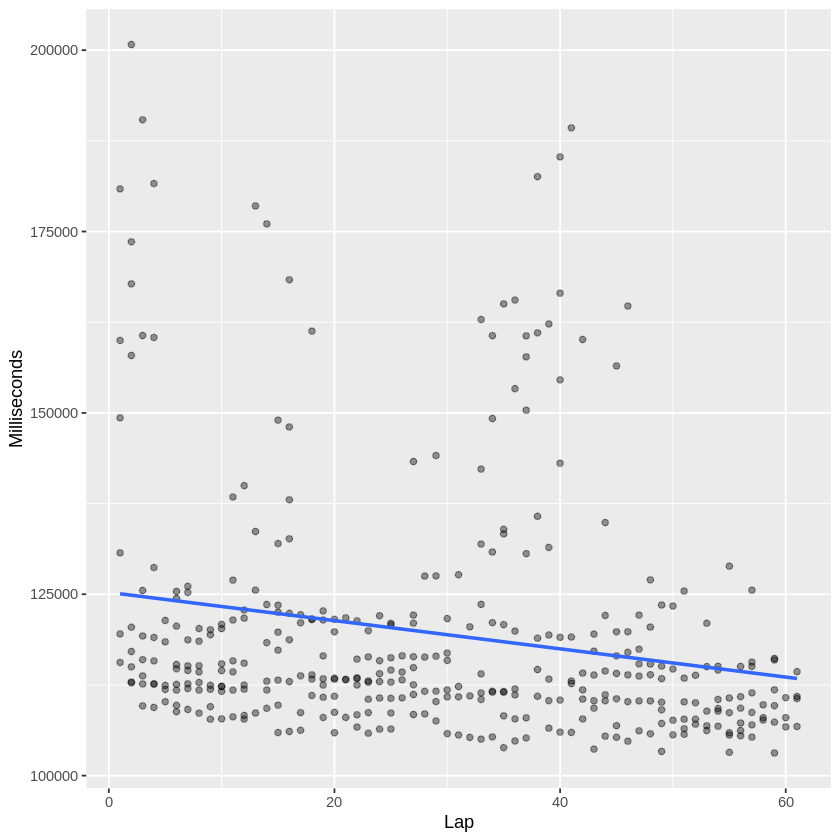

In [20]:
#17. Singapore

dr_singapore <- ric_laps %>%
                filter(raceId %in% singapore_race_ID) 

dr_singapore_clean <- dr_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_singapore_clean_ID <- dr_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_singapore_races <- ric_laps %>%
                    filter(raceId %in% dr_singapore_clean_ID)

formulaone_split <- initial_split(dr_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5453510,90.89183,1.514864


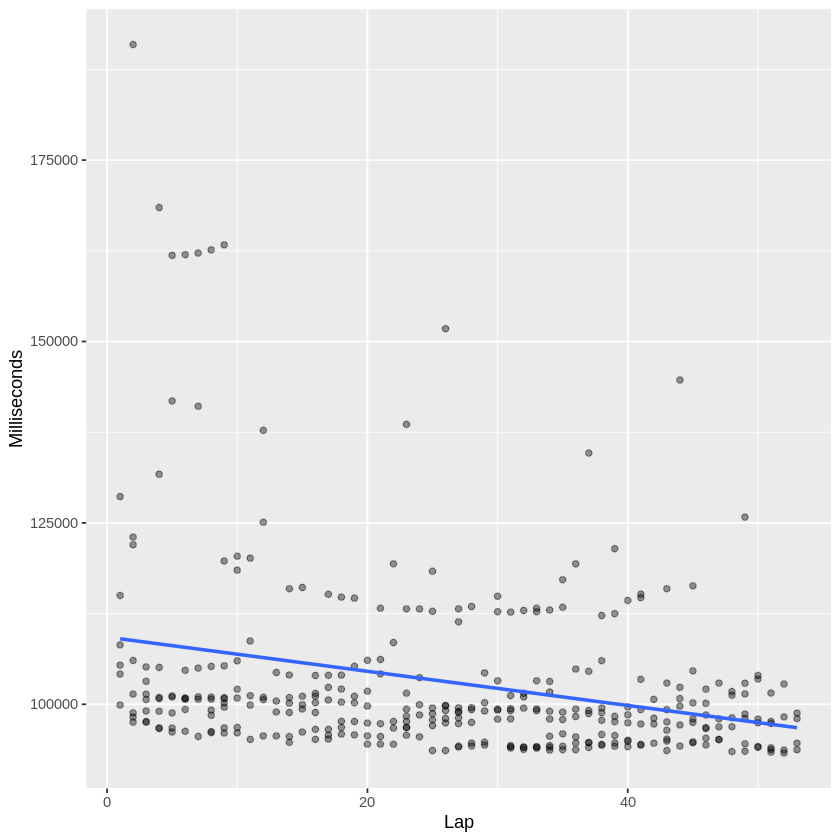

In [21]:
#18. Japan

dr_japan <- ric_laps %>%
                filter(raceId %in% japan_race_ID) 

dr_japan_clean <- dr_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
dr_japan_clean_ID <- dr_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_japan_races <- ric_laps %>%
                    filter(raceId %in% dr_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(dr_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5994331,99.90551,1.665092


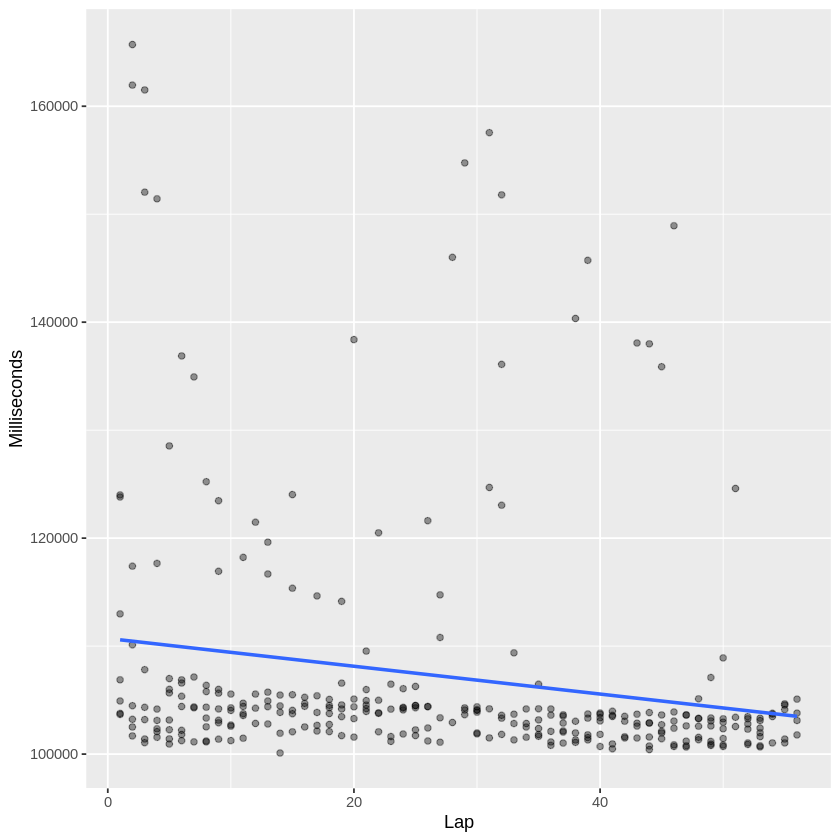

In [22]:
#19. USA, Austin

dr_austin <- ric_laps %>%
                filter(raceId %in% austin_race_ID) 

dr_austin_clean <- dr_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_austin_clean_ID <- dr_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_austin_races <- ric_laps %>%
                    filter(raceId %in% dr_austin_clean_ID)

formulaone_split <- initial_split(dr_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6037972,100.6329,1.677214


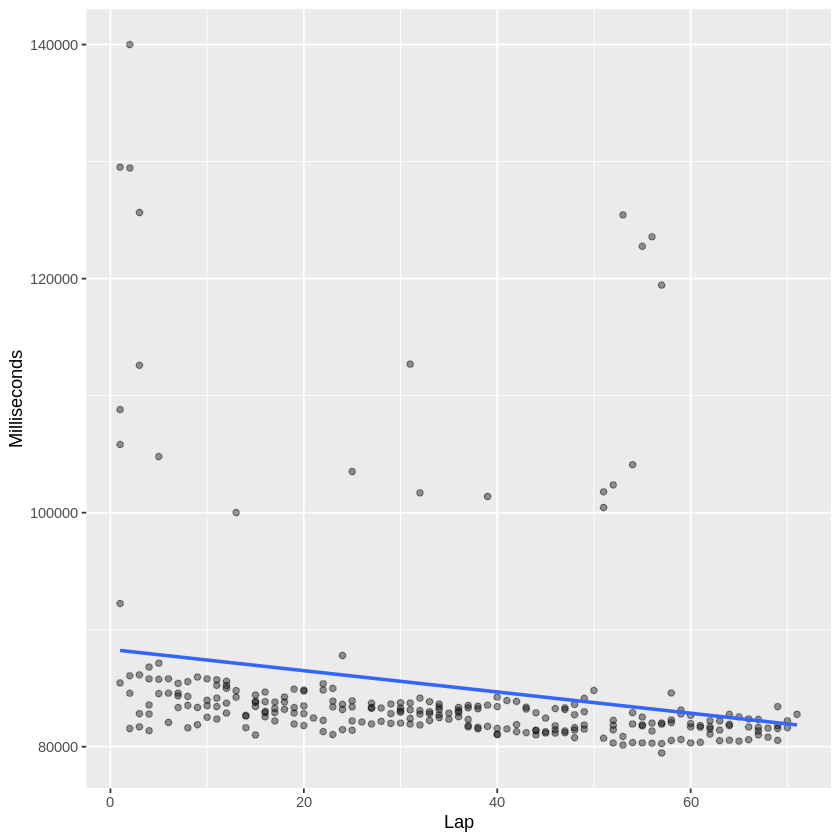

In [23]:
#20. Mexico

dr_mexico <- ric_laps %>%
                filter(raceId %in% mexico_race_ID) 

dr_mexico_clean <- dr_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_mexico_clean_ID <- dr_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_mexico_races <- ric_laps %>%
                    filter(raceId %in% dr_mexico_clean_ID)

formulaone_split <- initial_split(dr_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5843099,97.38498,1.623083


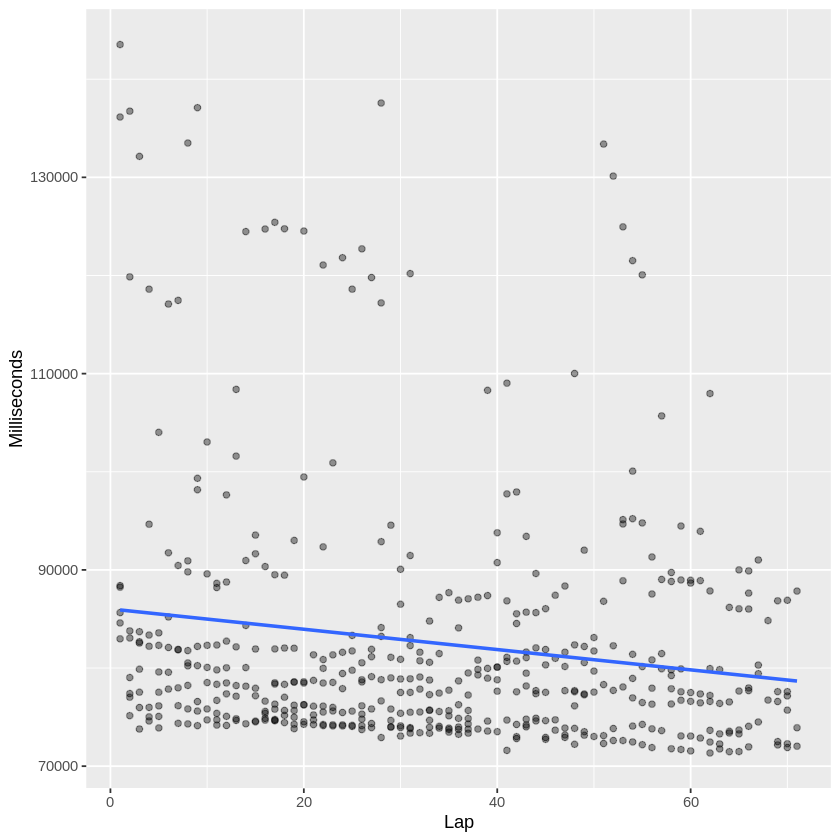

In [24]:
#21. Brazil

dr_brazil <- ric_laps %>%
                filter(raceId %in% brazil_race_ID) 

dr_brazil_clean <- dr_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_brazil_clean_ID <- dr_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_brazil_races <- ric_laps %>%
                    filter(raceId %in% dr_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(dr_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6224371,103.7395,1.728992


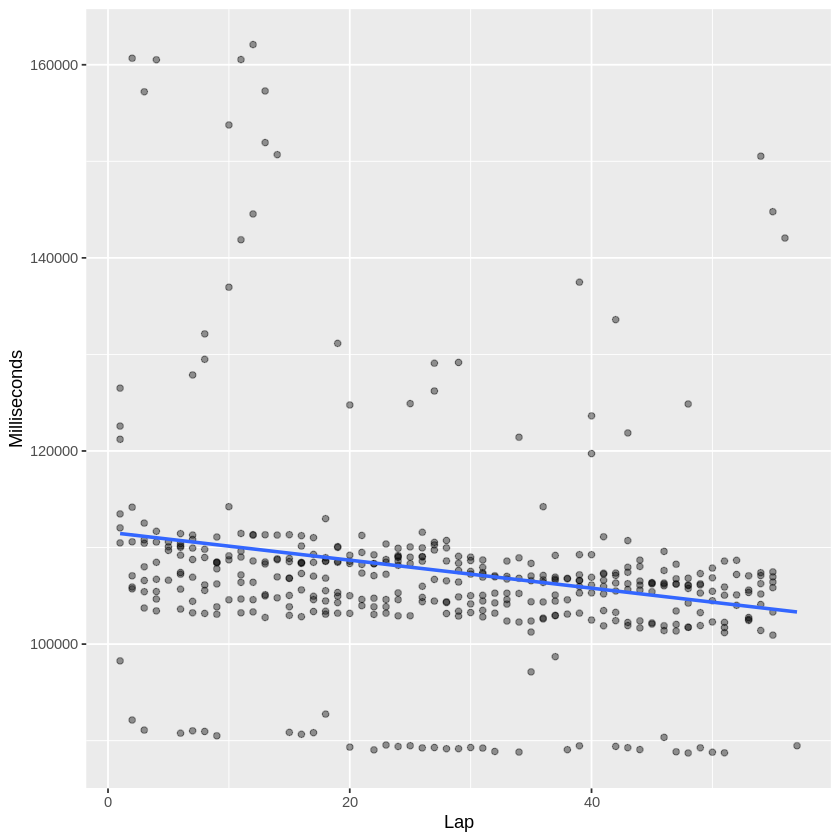

In [25]:
#22. Abu Dhabi

dr_uae <- ric_laps %>%
                filter(raceId %in% uae_race_ID) 

dr_uae_clean <- dr_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

dr_uae_clean_ID <- dr_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

dr_uae_races <- ric_laps %>%
                    filter(raceId %in% dr_uae_clean_ID)

formulaone_split <- initial_split(dr_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()